In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [3]:
X = pd.read_pickle("X_preprocessing")
y = pd.read_pickle("y_preprocessing")

# Random Forest

In [4]:
rfc_model = RandomForestClassifier(random_state=69)

In [5]:
# Random Forest Classifier Model
window_size = 1000  # Initial training size
step_size = 21      # Move forward step_size day(s) at a time
rfc_predictions = []
actual_values = []

# The Loop
# We start at "window_size", so we have enough data for the first training
for i in range(window_size, len(X), step_size):

    end_idx = min(i + step_size, len(X))
    
    # Training set is the fixed-size chunk immediately behind the current point
    X_train = X.iloc[i - window_size : i]
    y_train = y.iloc[i - window_size : i]
    
    # The very next day we want to predict
    X_test = X.iloc[i : end_idx]
    y_true = y.iloc[i : end_idx]
    
    # Train the model
    rfc_model.fit(X_train, y_train)
    
    # Predict
    prediction = rfc_model.predict(X_test)

    rfc_predictions.extend(prediction)

    # 5. Store actual values
    actual_values.extend(y_true)

print(f"Total predictions made: {len(rfc_predictions)}")
print(f"Number of actual values: {len(actual_values)}")

Total predictions made: 8826
Number of actual values: 8826


In [6]:
# My Model's Score
print("--- My Model Report ---")
print(classification_report(actual_values, rfc_predictions))

# Always Up Baseline
always_up = [1] * len(actual_values)

print("--- Always Up Baseline ---")
print(classification_report(actual_values, always_up, zero_division=0))

--- My Model Report ---
              precision    recall  f1-score   support

           0       0.48      0.40      0.44      4096
           1       0.55      0.62      0.58      4730

    accuracy                           0.52      8826
   macro avg       0.51      0.51      0.51      8826
weighted avg       0.52      0.52      0.51      8826

--- Always Up Baseline ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4096
           1       0.54      1.00      0.70      4730

    accuracy                           0.54      8826
   macro avg       0.27      0.50      0.35      8826
weighted avg       0.29      0.54      0.37      8826



In [7]:
# Random Forest Classifier Model
window_size = 1000  # Initial training size
step_size = 21      # Move forward step_size day(s) at a time
rfc_predictions = []
actual_values = []

# The Loop
# We start at "window_size", so we have enough data for the first training
for i in range(window_size, len(X), step_size):

    end_idx = min(i + step_size, len(X))
    
    # Training set is the fixed-size chunk immediately behind the current point
    X_train = X.iloc[i - window_size : i]
    y_train = y.iloc[i - window_size : i]
    
    # The very next day we want to predict
    X_test = X.iloc[i : end_idx]
    y_true = y.iloc[i : end_idx]
    
    # Train the model
    rfc_model.fit(X_train, y_train)

    # Get probabilities for all days in the test chunk
    probs = rfc_model.predict_proba(X_test) 
    
    # Loop through each of those 21 days individually
    for j in range(len(probs)):
        prob_down = probs[j][0]
        prob_up = probs[j][1]
        
        if prob_up > 0.60:
            rfc_predictions.append(1)
            actual_values.append(y_true.iloc[j])
        elif prob_down > 0.60:
            rfc_predictions.append(0)
            actual_values.append(y_true.iloc[j])
        # If it's between 40% and 60%, we do nothing (No .append happens)

print(f"Total predictions made: {len(rfc_predictions)}")
print(f"Number of actual values: {len(actual_values)}")

Total predictions made: 2622
Number of actual values: 2622


In [8]:
# My Model's Score
print("--- My Model Report ---")
print(classification_report(actual_values, rfc_predictions))

# Always Up Baseline
always_up = [1] * len(actual_values)

print("--- Always Up Baseline ---")
print(classification_report(actual_values, always_up, zero_division=0))

--- My Model Report ---
              precision    recall  f1-score   support

           0       0.51      0.30      0.38      1218
           1       0.55      0.75      0.64      1404

    accuracy                           0.54      2622
   macro avg       0.53      0.53      0.51      2622
weighted avg       0.53      0.54      0.52      2622

--- Always Up Baseline ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1218
           1       0.54      1.00      0.70      1404

    accuracy                           0.54      2622
   macro avg       0.27      0.50      0.35      2622
weighted avg       0.29      0.54      0.37      2622



# Logistic Regression


In [9]:
log_model = make_pipeline(StandardScaler(), LogisticRegression())

In [10]:
# Logistic Regression Model
window_size = 1000  # Initial training size
step_size = 21      # Move forward step_size day(s) at a time
log_predictions = []
actual_values = []

# The Loop
# We start at "window_size", so we have enough data for the first training
for i in range(window_size, len(X), step_size):

    end_idx = min(i + step_size, len(X))
    
    # Training set is the fixed-size chunk immediately behind the current point
    X_train = X.iloc[i - window_size : i]
    y_train = y.iloc[i - window_size : i]
    
    # The very next day we want to predict
    X_test = X.iloc[i : end_idx]
    y_true = y.iloc[i : end_idx]
    
    # Train the model
    log_model.fit(X_train, y_train)
    
    # Predict
    prediction = log_model.predict(X_test)

    log_predictions.extend(prediction)

    # 5. Store actual values
    actual_values.extend(y_true)

print(f"Total predictions made: {len(log_predictions)}")
print(f"Number of actual values: {len(actual_values)}")

Total predictions made: 8826
Number of actual values: 8826


In [11]:
# My Model's Score
print("--- My Model Report ---")
print(classification_report(actual_values, log_predictions))

# Always Up Baseline
always_up = [1] * len(actual_values)

print("--- Always Up Baseline ---")
print(classification_report(actual_values, always_up, zero_division=0))

--- My Model Report ---
              precision    recall  f1-score   support

           0       0.48      0.37      0.42      4096
           1       0.55      0.66      0.60      4730

    accuracy                           0.52      8826
   macro avg       0.52      0.51      0.51      8826
weighted avg       0.52      0.52      0.51      8826

--- Always Up Baseline ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4096
           1       0.54      1.00      0.70      4730

    accuracy                           0.54      8826
   macro avg       0.27      0.50      0.35      8826
weighted avg       0.29      0.54      0.37      8826



In [12]:
# Logistic Regression Model
window_size = 1000  # Initial training size
step_size = 21      # Move forward step_size day(s) at a time
log_predictions = []
actual_values = []

# The Loop
# We start at "window_size", so we have enough data for the first training
for i in range(window_size, len(X), step_size):

    end_idx = min(i + step_size, len(X))
    
    # Training set is the fixed-size chunk immediately behind the current point
    X_train = X.iloc[i - window_size : i]
    y_train = y.iloc[i - window_size : i]
    
    # The very next day we want to predict
    X_test = X.iloc[i : end_idx]
    y_true = y.iloc[i : end_idx]
    
    # Train the model
    log_model.fit(X_train, y_train)
    
    # Get probabilities for all days in the test chunk
    probs = log_model.predict_proba(X_test) 

    # Loop through each of those 21 days individually
    for j in range(len(probs)):
        prob_down = probs[j][0]
        prob_up = probs[j][1]
        
        if prob_up > 0.60:
            log_predictions.append(1)
            actual_values.append(y_true.iloc[j])
        elif prob_down > 0.60:
            log_predictions.append(0)
            actual_values.append(y_true.iloc[j])
        # If it's between 40% and 60%, we do nothing (No .append happens)

print(f"Total predictions made: {len(log_predictions)}")
print(f"Number of actual values: {len(actual_values)}")

Total predictions made: 3235
Number of actual values: 3235


In [13]:
# My Model's Score
print("--- My Model Report ---")
print(classification_report(actual_values, log_predictions))

# Always Up Baseline
always_up = [1] * len(actual_values)

print("--- Always Up Baseline ---")
print(classification_report(actual_values, always_up, zero_division=0))

--- My Model Report ---
              precision    recall  f1-score   support

           0       0.51      0.29      0.37      1503
           1       0.55      0.75      0.64      1732

    accuracy                           0.54      3235
   macro avg       0.53      0.52      0.50      3235
weighted avg       0.53      0.54      0.51      3235

--- Always Up Baseline ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1503
           1       0.54      1.00      0.70      1732

    accuracy                           0.54      3235
   macro avg       0.27      0.50      0.35      3235
weighted avg       0.29      0.54      0.37      3235



# Models Review

C:\Users\ado18\AppData\Local\Temp\ipykernel_30036\2086433162.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X.columns[sorted_idx])


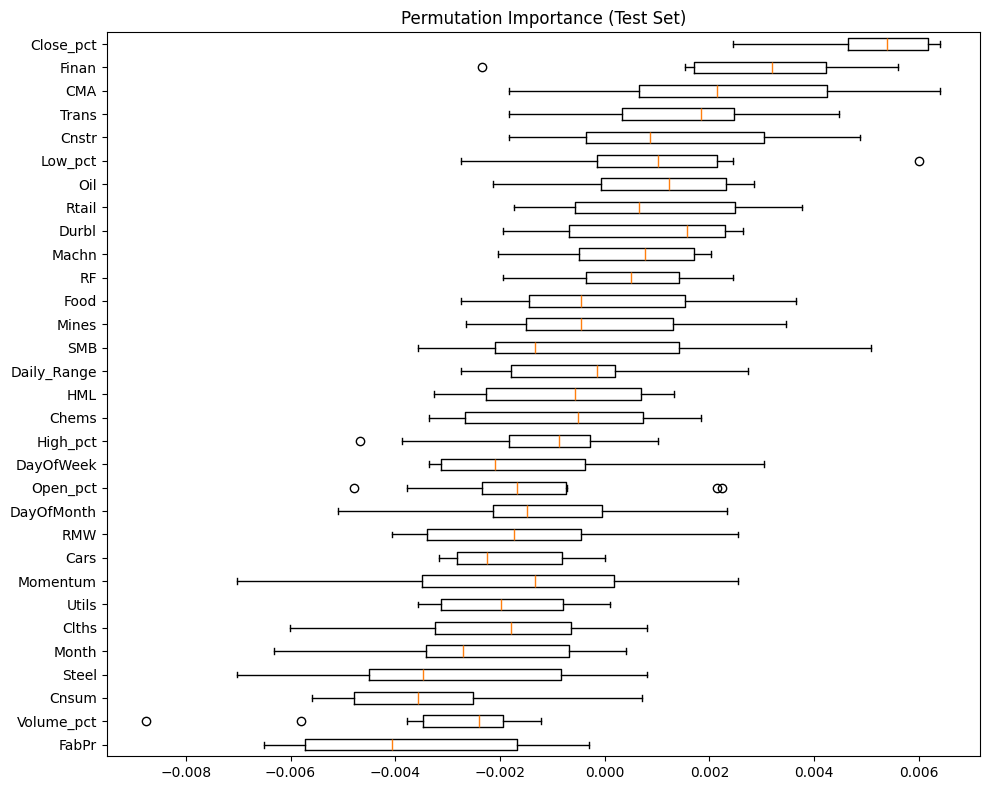

In [14]:
from sklearn.inspection import permutation_importance

# This "shuffles" each column one by one to see how much the accuracy drops
result = permutation_importance(rfc_model, X, y, n_repeats=10, random_state=42)

# Plotting the result
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10, 8))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X.columns[sorted_idx])
plt.title("Permutation Importance (Test Set)")
plt.tight_layout()
plt.show()